In [10]:
import numpy as np
!pip install pandas
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.dates import DateFormatter, AutoDateLocator
import matplotlib.dates as mdates
drive.mount('/content/drive')
file_path_time_series = '/content/drive/My Drive/Diplomski/diplomski/datasets/google/price_diff_results/ARIMA_GARCH_GOOG_price_diff_values.xlsx'
file_path_fund = '/content/drive/My Drive/Diplomski/diplomski/datasets/google/price_diff_results/DT_fund_GOOG_price_diff_values.xlsx'
file_path_ta = '/content/drive/My Drive/Diplomski/diplomski/datasets/google/price_diff_results/DT_ta_GOOG_price_diff_values.xlsx'
file_path_tweet = '/content/drive/My Drive/Diplomski/diplomski/datasets/google/price_diff_results/DT_tweet_GOOG_price_diff_values.xlsx'

file_path_prices = '/content/drive/My Drive/Diplomski/diplomski/datasets/google/Google_historical_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df_time_series = pd.read_excel(file_path_time_series)
df_fund = pd.read_excel(file_path_fund)
df_ta = pd.read_excel(file_path_ta)
df_tweet = pd.read_excel(file_path_tweet)

df_prices = pd.read_csv(file_path_prices)
features_to_shift = [
  "Adj_Close"
]

df_prices['today_price'] = df_prices['Adj_Close']
df_prices[features_to_shift] = df_prices[features_to_shift].shift(1)
df_prices['prediction'] = df_prices['today_price'] -  df_prices['Adj_Close']
df_prices['price_diff'] = df_prices['prediction'].shift(1)

df_prices = df_prices[(df_prices['Date'] >= '2015-01-01') & (df_prices['Date'] <= '2020-01-01')]

#df_tweet['price_diff'] = df_tweet['price_diff'].str.replace('[', '').str.replace(']', '').astype(float)
df_fund['price_diff'] = df_fund['price_diff'].str.replace('[', '').str.replace(']', '').astype(float)

In [12]:
df_fund = df_fund.iloc[2:]

In [13]:
df_ta['price_diff'] = df_ta['price_diff'].apply(lambda x: str(x))
df_ta['price_diff'] = df_ta['price_diff'].apply(lambda x: x.strip('[[]]').split(',')[0])
df_ta['price_diff'] = df_ta['price_diff'].astype(float)

df_tweet['price_diff'] = df_tweet['price_diff'].apply(lambda x: str(x))
df_tweet['price_diff'] = df_tweet['price_diff'].apply(lambda x: x.strip('[[]]').split(',')[0])
df_tweet['price_diff'] = df_tweet['price_diff'].astype(float)

In [14]:
predictions_model_1 = np.array(df_time_series['price_diff'])
predictions_model_2 = np.array(df_fund['price_diff'])
predictions_model_3 = np.array(df_ta['price_diff'])
predictions_model_4 = np.array(df_tweet['price_diff'])

predictions = np.vstack((predictions_model_1, predictions_model_2, predictions_model_3, predictions_model_4))
predictions = np.mean(predictions, axis=0)


In [15]:
train_size = int(len(df_prices) * 0.8)

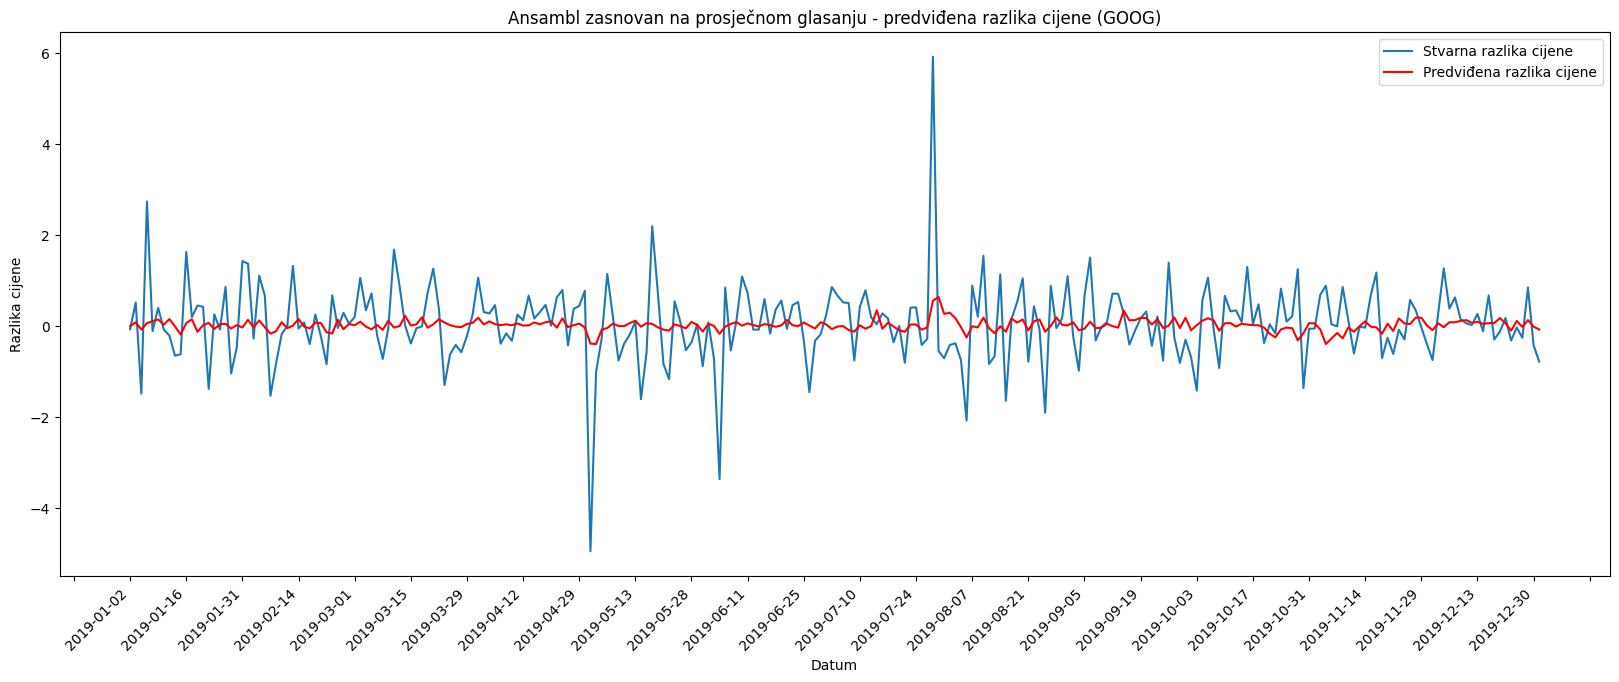

In [16]:
plot_data = df_prices.copy()
plot_data = plot_data.iloc[train_size:]

actual_values = plot_data['price_diff']

plt.figure(figsize=(20, 8))

plt.plot(plot_data["Date"], actual_values, label='Stvarna razlika cijene')
plt.plot(plot_data["Date"], predictions, label='Predviđena razlika cijene', color='red')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate(rotation=45)

plt.xlabel('Datum')
plt.ylabel('Razlika cijene')
plt.title('Ansambl zasnovan na prosječnom glasanju - predviđena razlika cijene (GOOG)')
plt.legend()

plt.show()

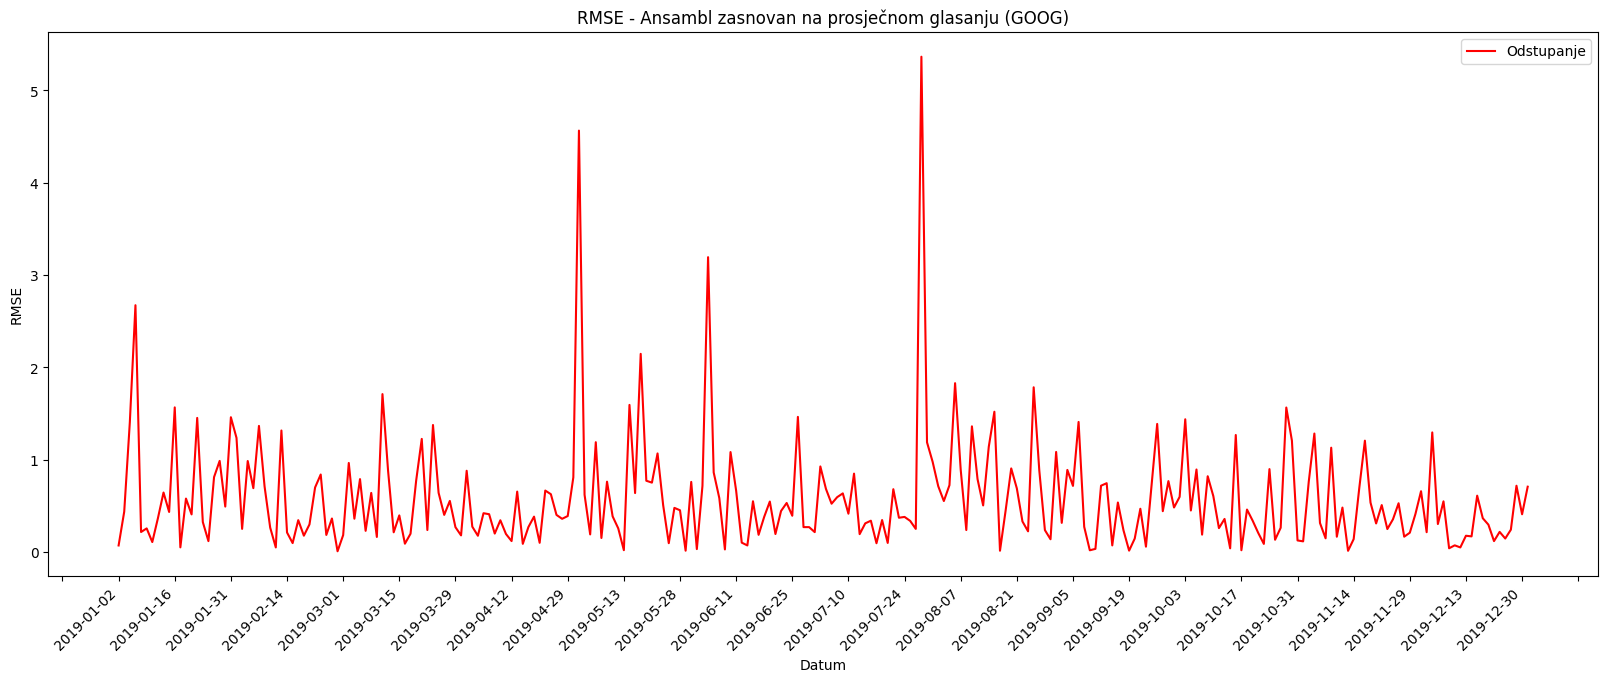

In [17]:
rmse_values = np.sqrt((actual_values - predictions) ** 2)

plot_data = df_prices.copy()
plot_data = plot_data.iloc[train_size:]

plt.figure(figsize=(20, 8))
plt.plot(plot_data["Date"], rmse_values, label='Odstupanje', color='red')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate(rotation=45)

plt.xlabel('Datum')
plt.ylabel('RMSE')
plt.title('RMSE - Ansambl zasnovan na prosječnom glasanju (GOOG)')
plt.legend()

plt.show()

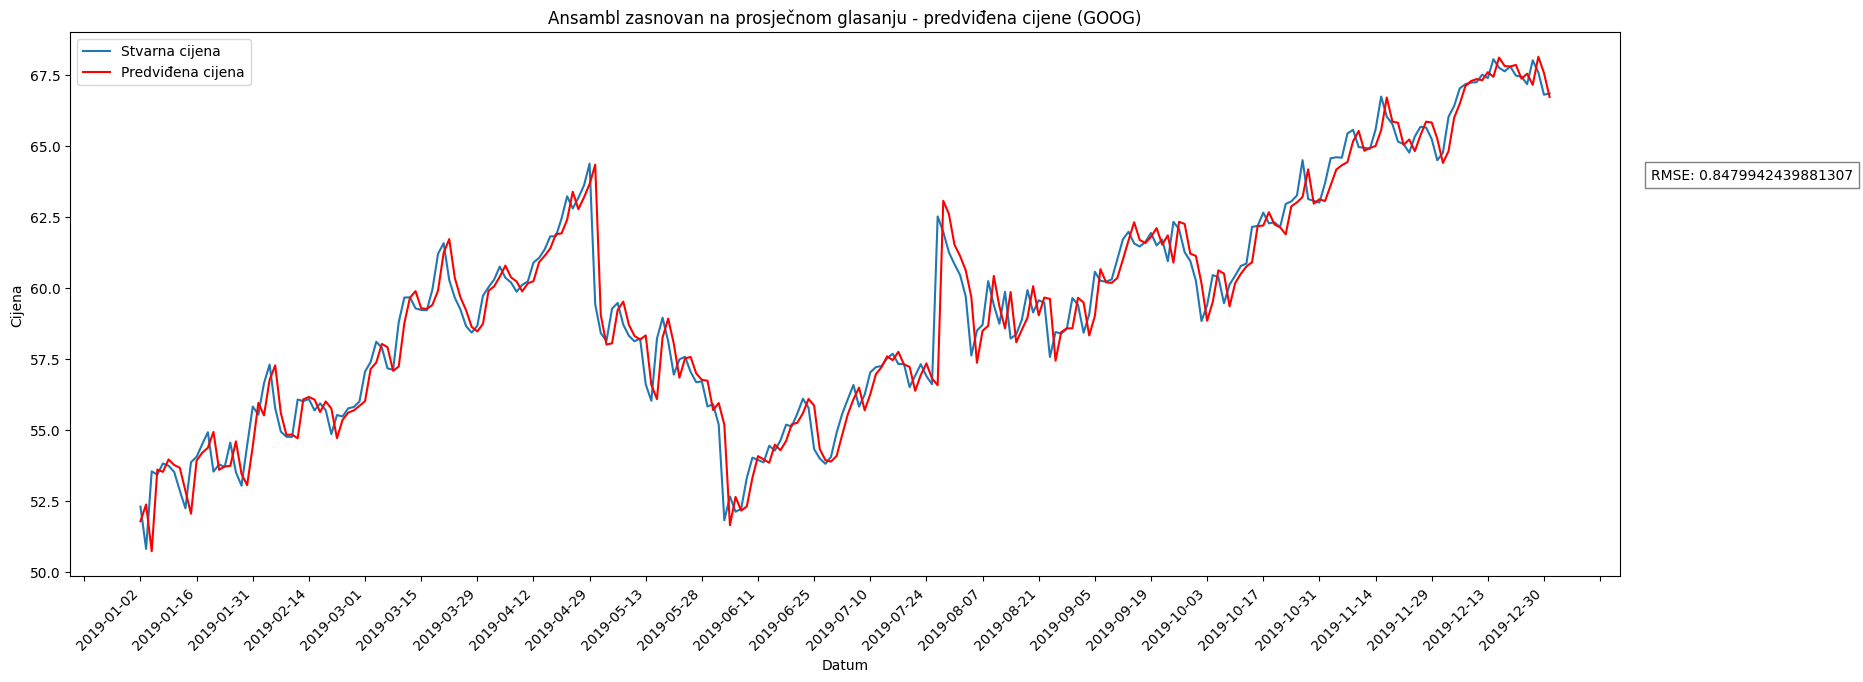

In [18]:
plot_data = df_prices.copy()
plot_data = plot_data.iloc[train_size:]

plot_data["predicted_diff"] = predictions

plot_data["Predicted_price"] = plot_data["Adj_Close"] + plot_data["predicted_diff"]

plt.figure(figsize=(20, 8))

plt.plot(plot_data["Date"], plot_data["today_price"], label='Stvarna cijena')
plt.plot(plot_data["Date"], plot_data["Predicted_price"], label='Predviđena cijena', color='red')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate(rotation=45)

plt.xlabel('Datum')
plt.ylabel('Cijena')
plt.title('Ansambl zasnovan na prosječnom glasanju - predviđena cijene (GOOG)')
plt.legend()

mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)

plt.text(1.02, 0.75, f'RMSE: {rmse}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()